In [10]:
# Use Custom Package
using Jevo

using LinearAlgebra, Plots, Statistics
gr()

Plots.GRBackend()

### Monomorphic Population with Kimura Subsitutions

Set up Parameters

#### Initiate Population

In [93]:
pop = Jevo.mono_pop(N=N, l=20, n=n, m=n)
Jevo.initiate!(pop)
pop

Jevo.mono_pop(1000, 20, 4, [3, 1, 4, 2, 4, 3, 4, 4, 1, 4, 4, 1, 1, 4, 2, 3, 4, 2, 1, 3], 4, [1, 3, 2, 3, 3, 1, 4, 4, 2, 1, 4, 1, 1, 1, 3, 2, 3, 1, 3, 4])

#### Set up Fitness Landscape

In [166]:
F1 = Jevo.num_fermi(n=4, l_0=10, gap=7, f0=f0, fl=fl)
Est(l::Int, epsilon::Real)= (3l/4 - 10) * gap
F2 = Jevo.fermi_fitness(beta=1, epsilon=0.7, f0=f0, fl=fl/10, E_Star=Est)

Jevo.fermi_fitness(10, 1.0, 0.7, 800.0, 0.5, Est)

In [167]:
l = 30
x = 0:0.7:0.7*30
y1 = Jevo.fitness.(x, 30, F1)
y2 = Jevo.fitness.(x, 30, F2)

x2 = 0:0.7:0.7*60
y21 = Jevo.fitness.(x2, 60, F1)
y22 = Jevo.fitness.(x2, 60, F2)

61-element Vector{Float64}:
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
   ⋮
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0
 770.0

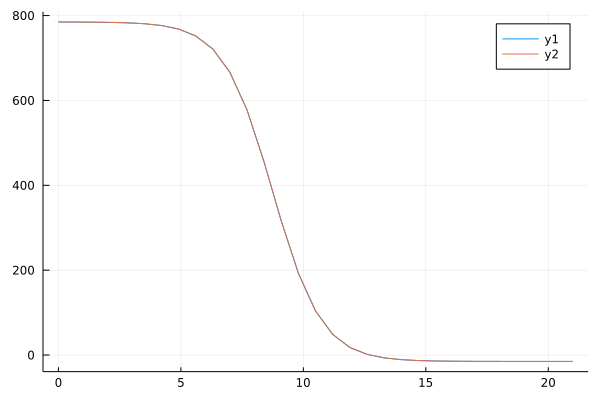

In [148]:
plot([x, x], [y1, y2])

In [183]:
#F = Jevo.fermi_fitness(beta=1, epsilon=0.7, f0=f0, fl=fl/10, E_Star=Est)
F = Jevo.num_fermi(n=4, l_0=10, gap=7, f0=f0, fl=fl)

Jevo.num_fermi(4, 10, 7, 800, 5.0)

#### Set up Energy Matrix

In [184]:
emat = 0.7 * (ones(n, n) - Matrix{Float64}(I, n, n))

4×4 Matrix{Float64}:
 0.0  0.7  0.7  0.7
 0.7  0.0  0.7  0.7
 0.7  0.7  0.0  0.7
 0.7  0.7  0.7  0.0

In [185]:
function run(κ, ν)
    pop = Jevo.mono_pop(N=N, l=20, n=n, m=n)
    Jevo.initiate!(pop, emat)
    E_arr = zeros(100000)
    L_arr = zeros(100000)
    done = false
    iter = 0
    while (~done) && (iter < 50)
        crashed = false
        r = 0
        while (~crashed) && r < 100000
            r += 1
            Jevo.bp_substitution!(pop, emat, F)
            if rand() < κ/N
                Jevo.driver_mutation!(pop)
            end
            if rand() < ν
                Jevo.l_substitution!(pop, emat, F)
            end
            L_arr[r] = length(pop.seqs)
            E_arr[r] = Jevo.get_energy(pop, emat) /(gap/ ll0)
            if L_arr[r] < 10
                crashed = true
                iter += 1
            end
        end
        if crashed == false
            done = true
        end
    end
    if iter == 50
        print("Maximum Number of iterations reached for κ=$κ")
        nothing
    else
        return L_arr, E_arr
    end
end

run (generic function with 1 method)

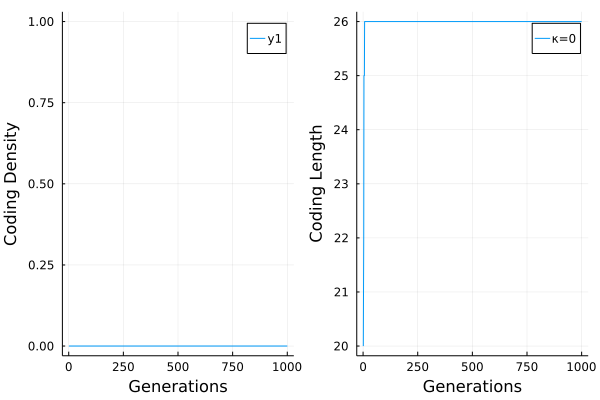

In [186]:
p1 = plot(xlabel="Generations", ylabel="Coding Density")
p2 = plot(xlabel="Generations", ylabel="Coding Length")
for κ in [0]#, 10, 50, 100, 200]#, 450]
    L_arr, E_arr = run(κ, 0.1)
    plot!(p1, E_arr[1:100:end])
    plot!(p2, L_arr[1:100:end], label="κ=$κ")
end

plot([p1, p2]...)#, size=(800, 300))

In [187]:
plot_list = []
for κ in [100, 300]
    L_arr, E_arr = run(κ, 0.1)
    #scatter!(p3, L_arr[10000:100:end], E_arr[10000:100:end], label="κ=$κ")
    push!(plot_list, histogram2d(
        L_arr[end-10000:end], 
        E_arr[end-10000:end], 
        nbins = 20, 
        color=:BuPu_9, 
        normed = true, 
        colorbar=false,
        xlabel="Coding Length", 
        ylabel="Coding Density"
    ))
end

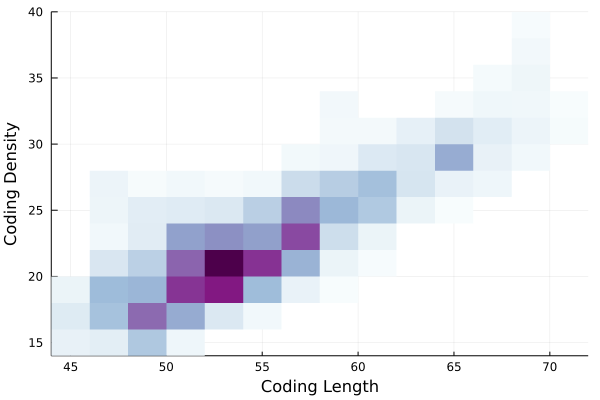

In [188]:
plot_list[2]